In [4]:
import os 
from glob import iglob

import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import pandas as pd
import numba

In [5]:
plt.rcParams['figure.dpi'] = 200

cm = 1/2.54

work_dir = 'd:\work\lysine\Lysine\diamanda_stuff'

colors = ['#d73027','#f46d43','#fdae61','#fee090','#e0f3f8','#abd9e9','#74add1','#4575b4']
angles = ['zero', 'alfa', 'beta', 'gamma', 'delta']
concentrations = [10,20,30,40,50,60,70,80]

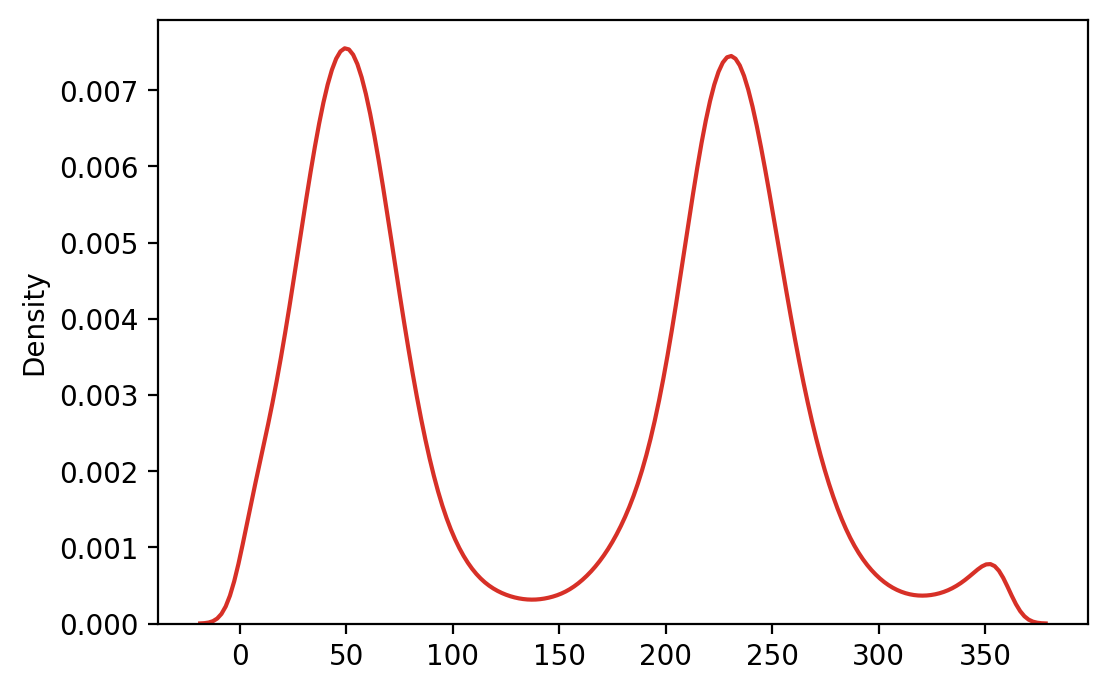

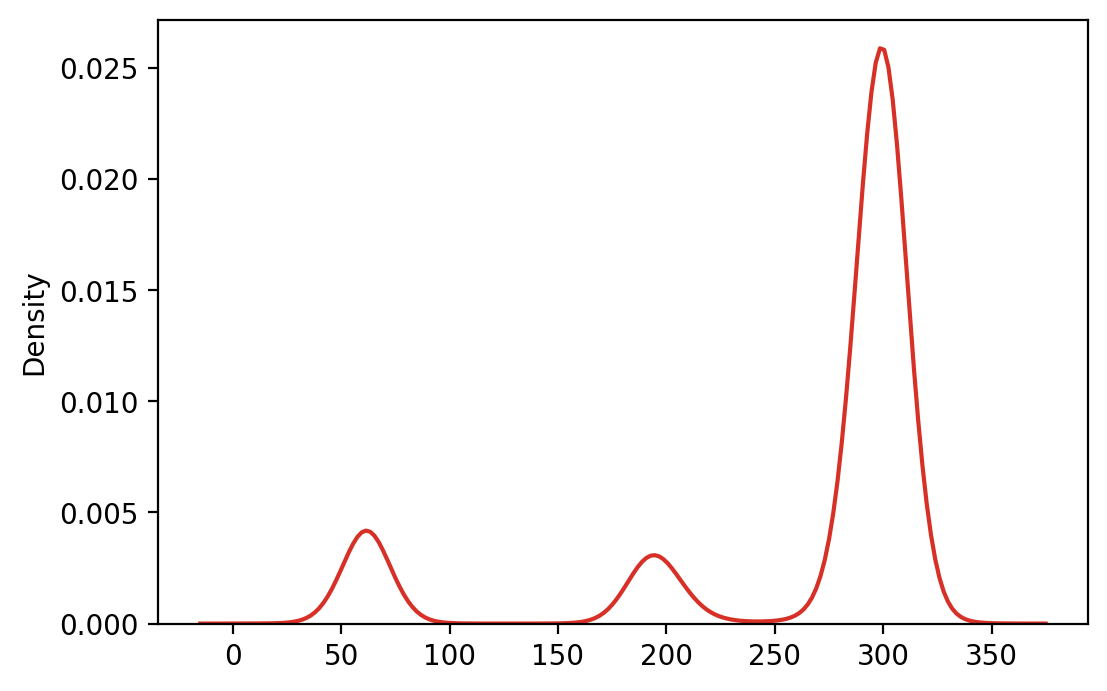

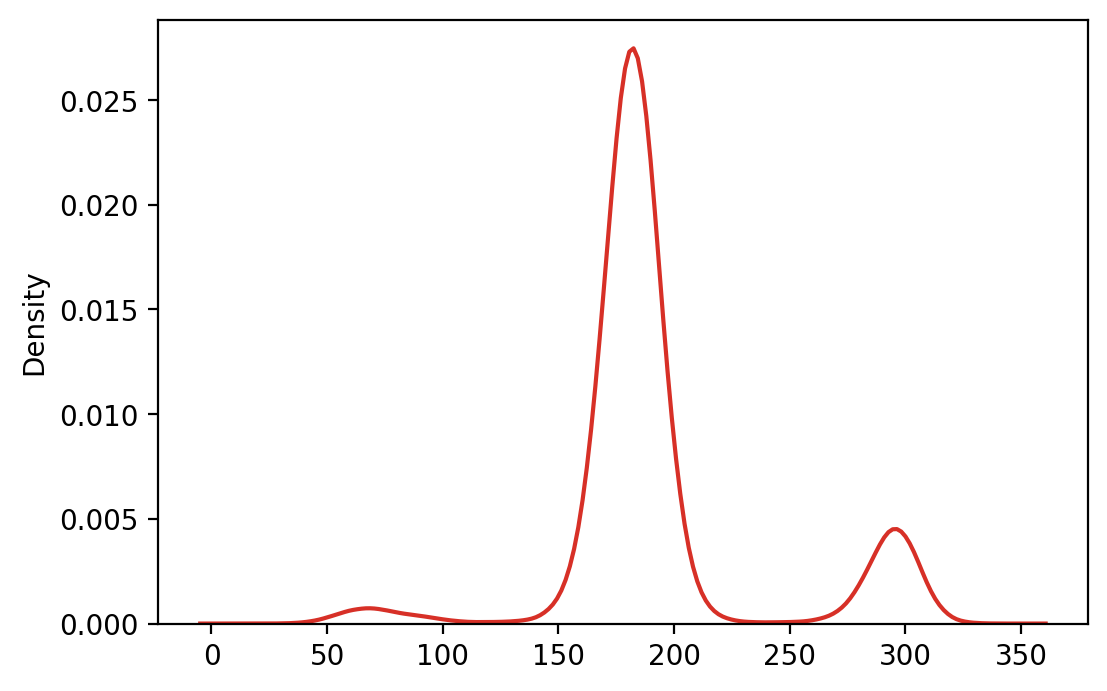

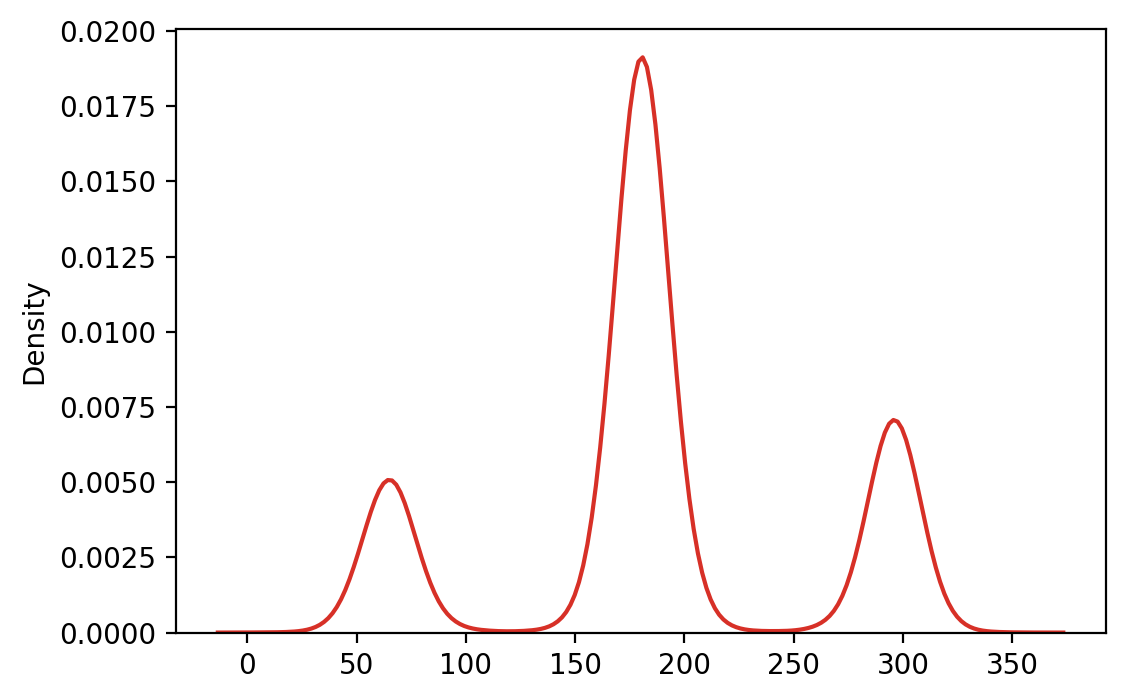

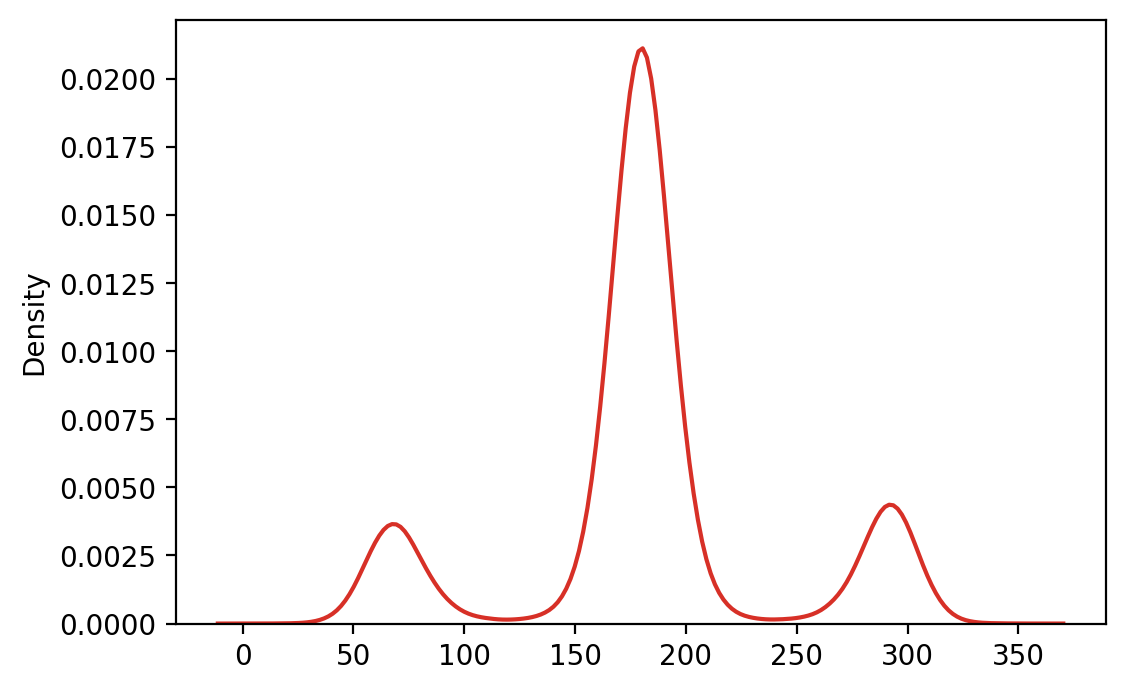

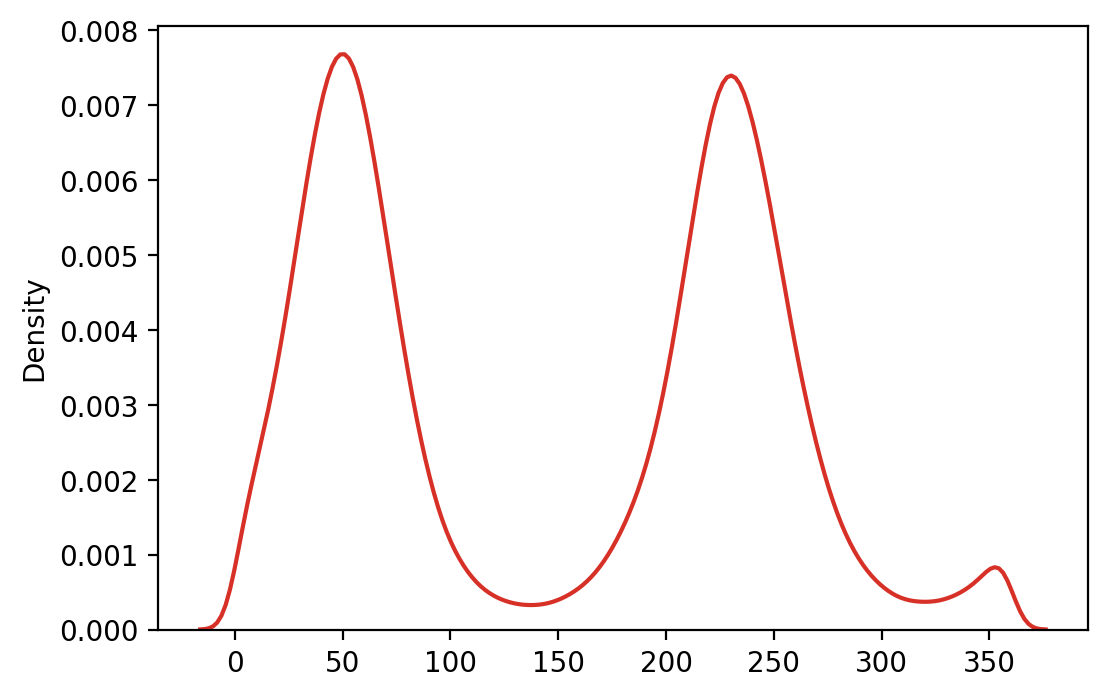

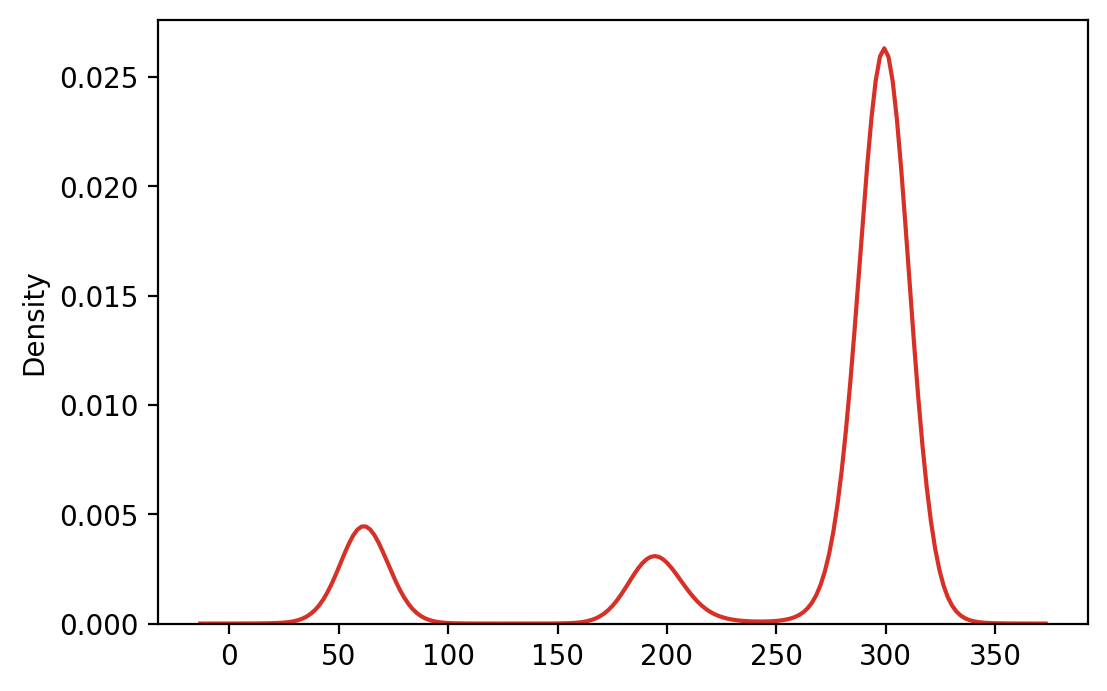

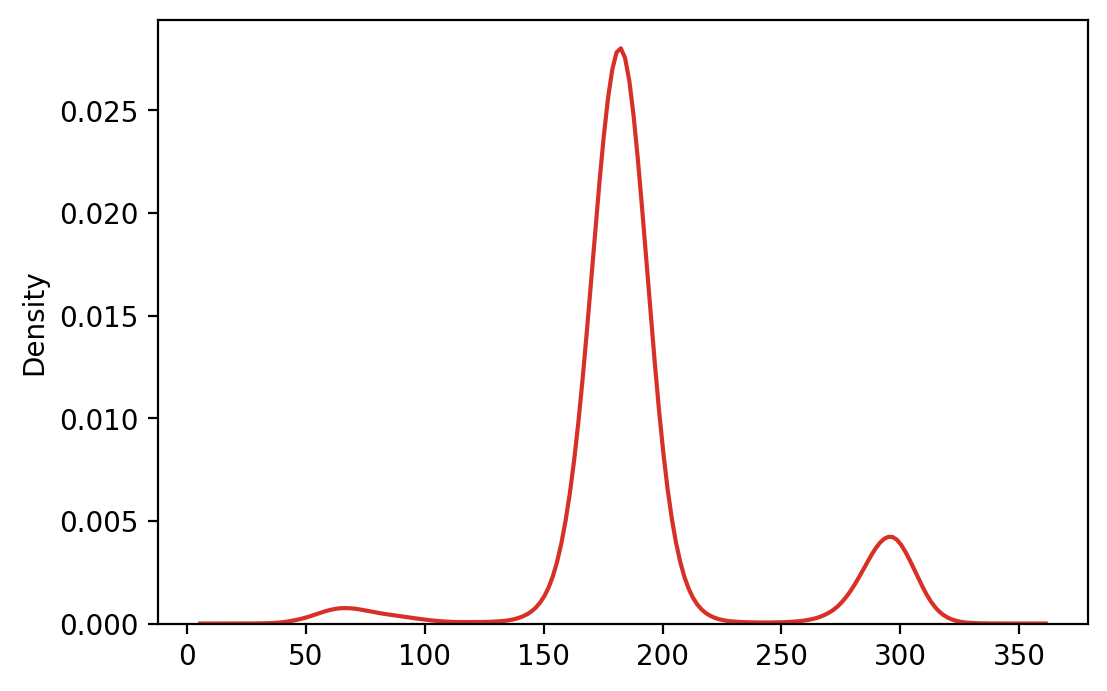

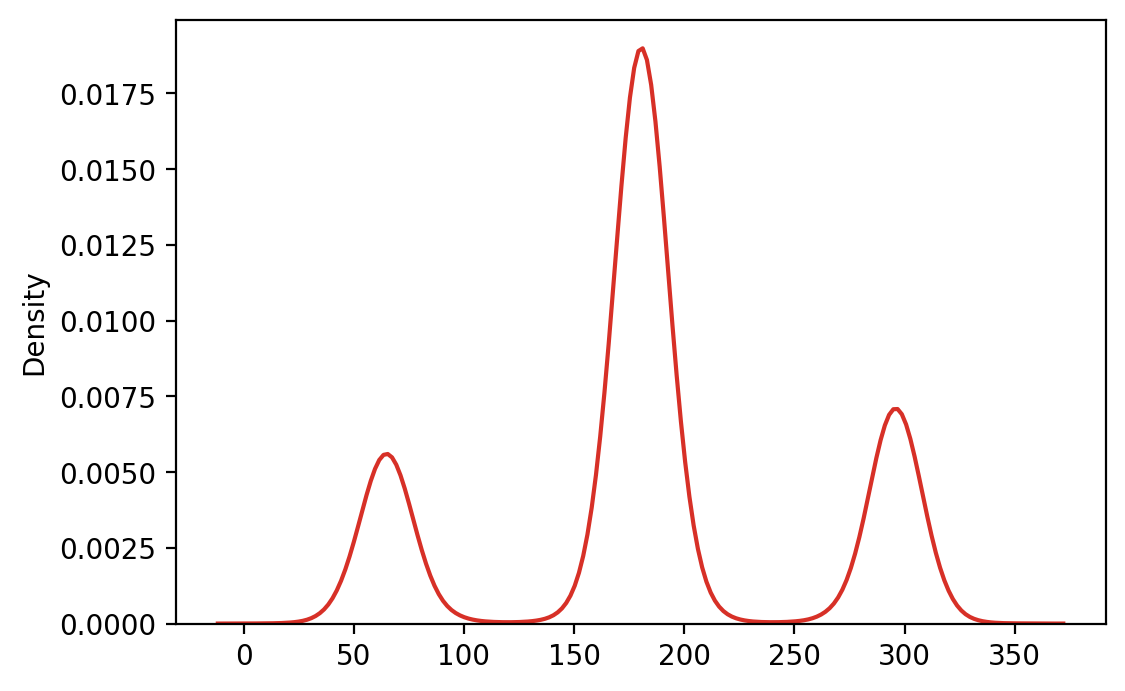

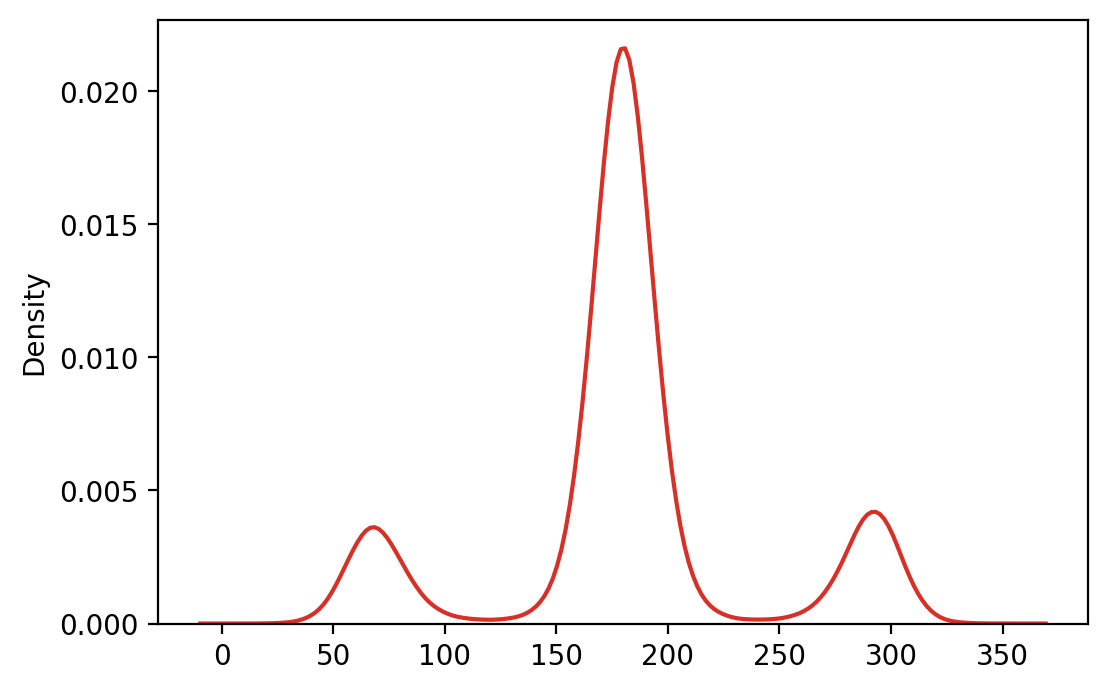

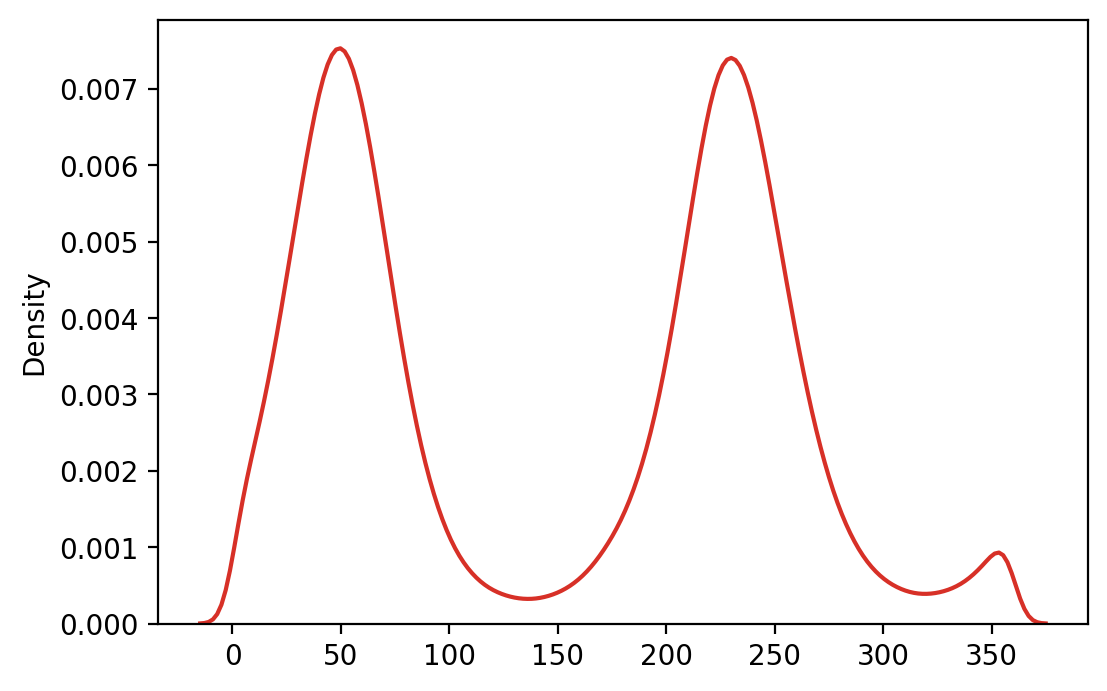

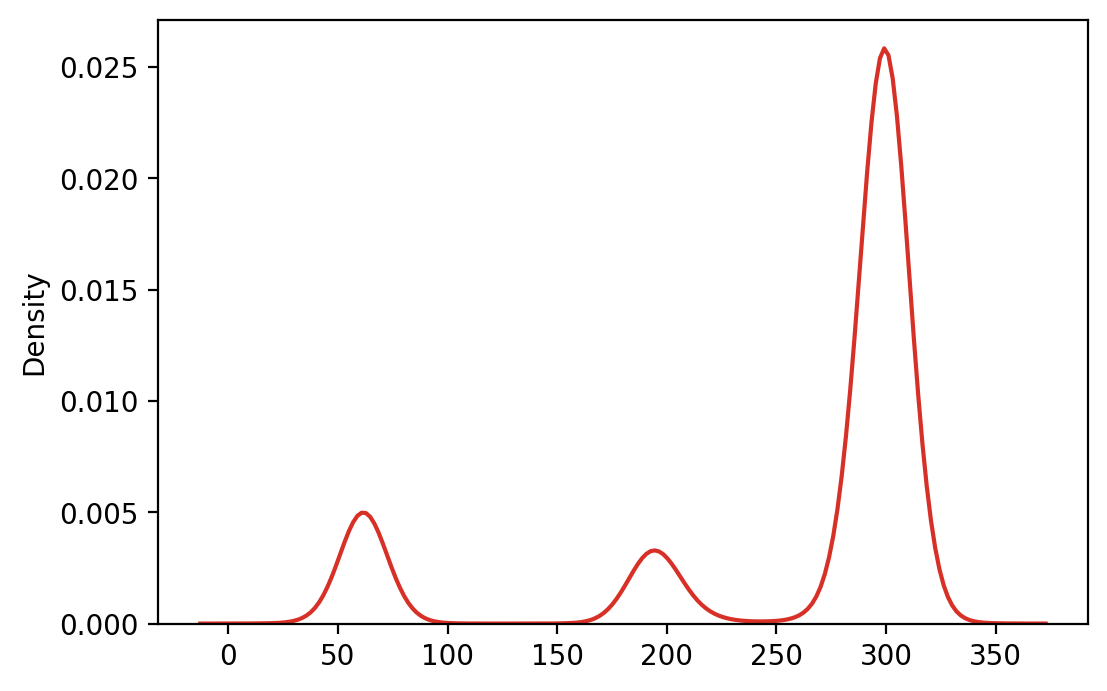

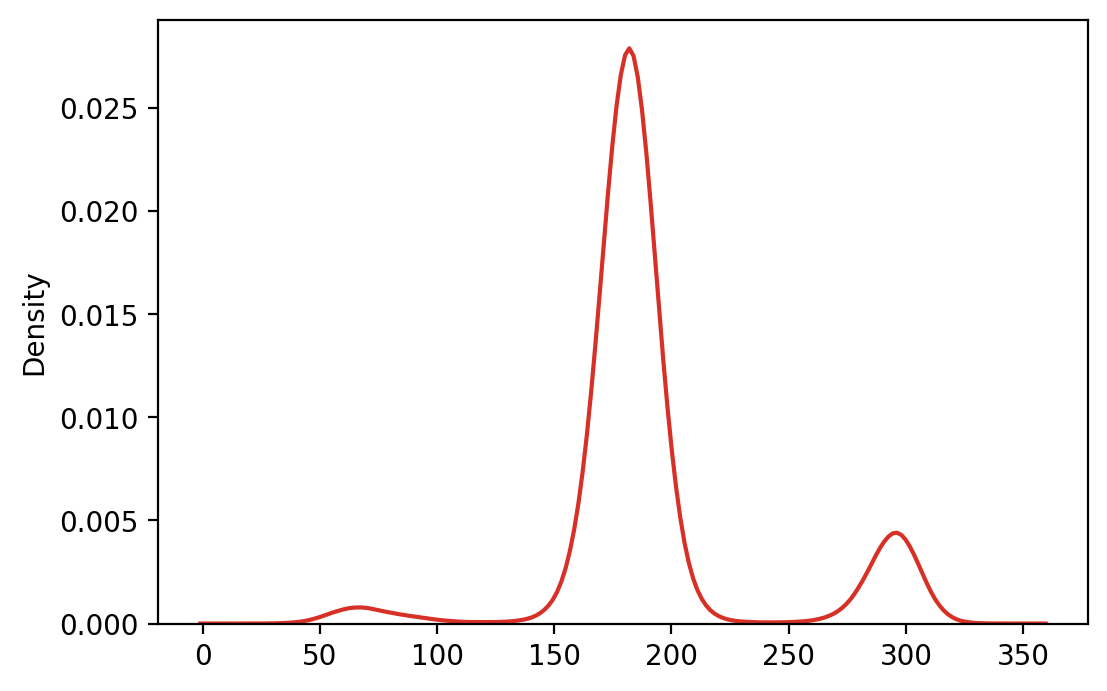

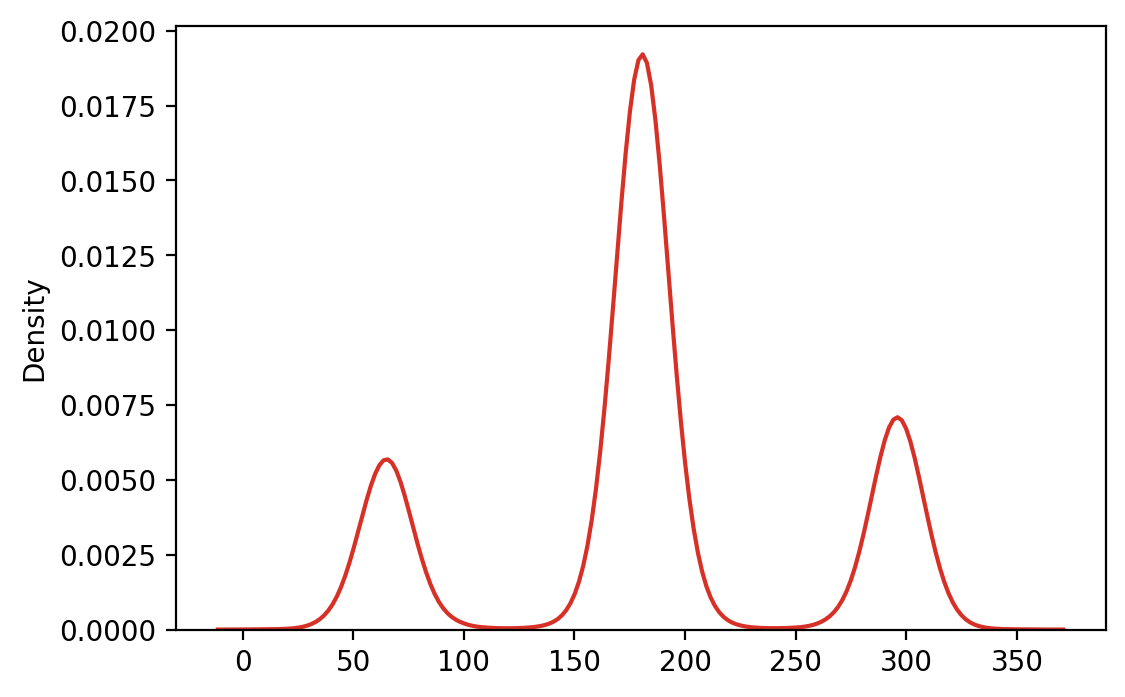

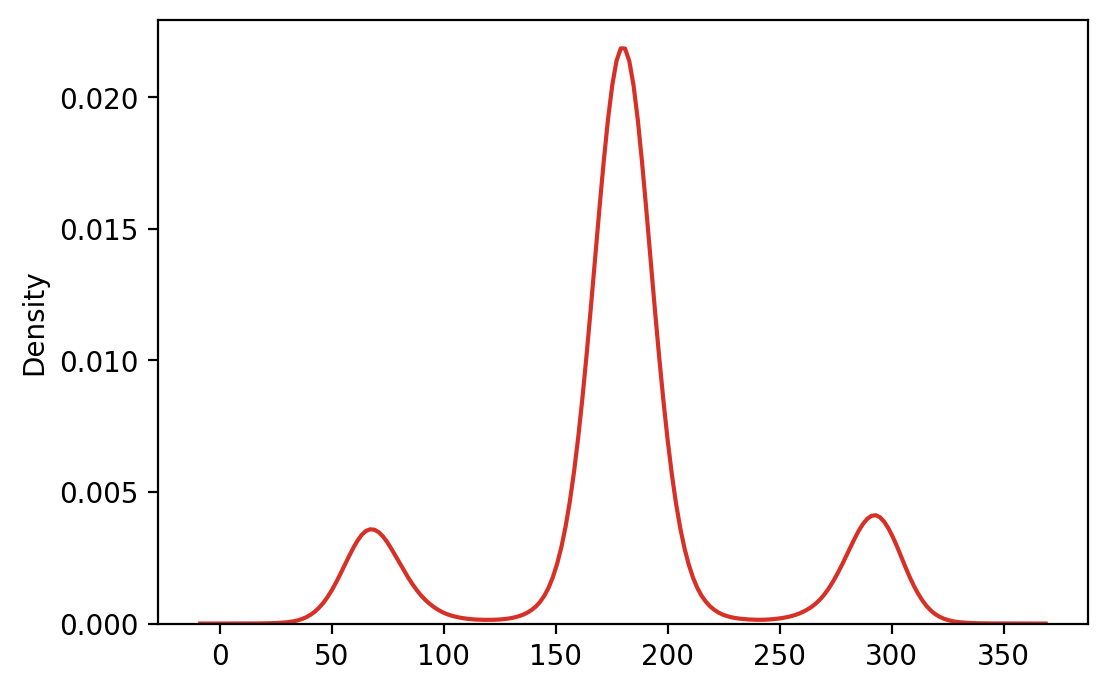

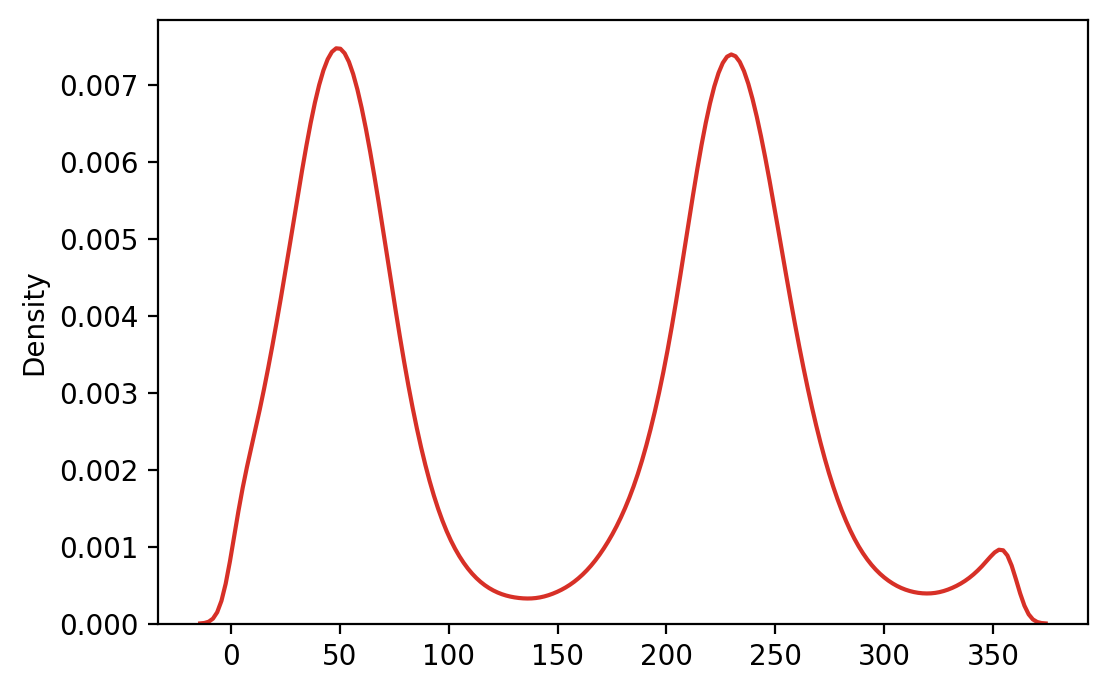

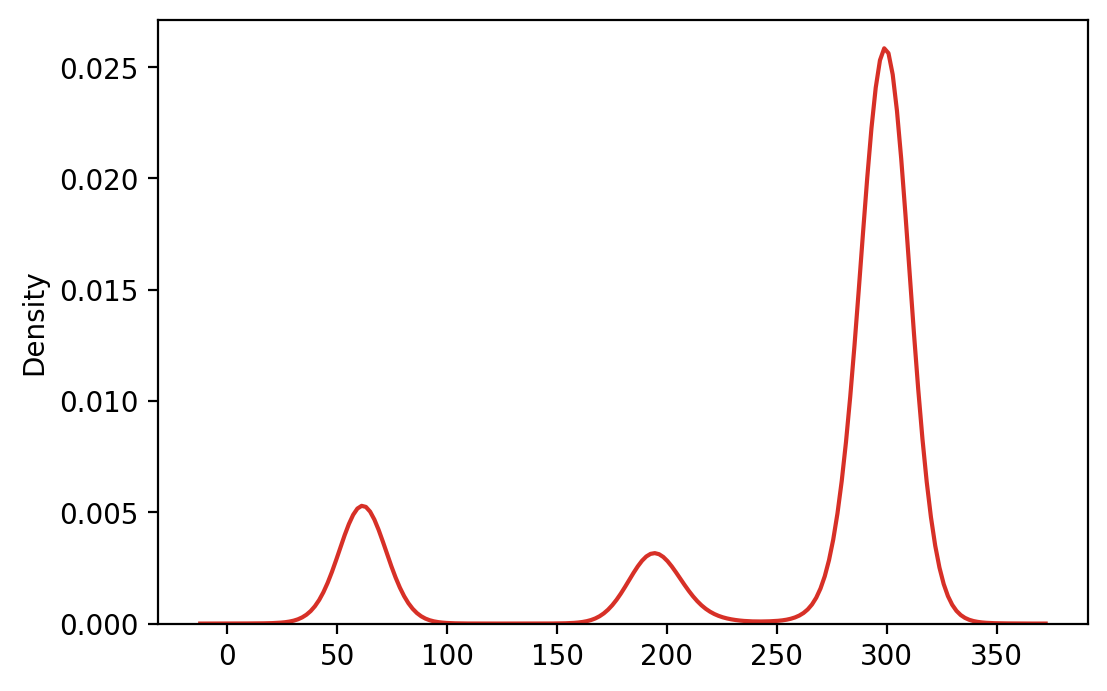

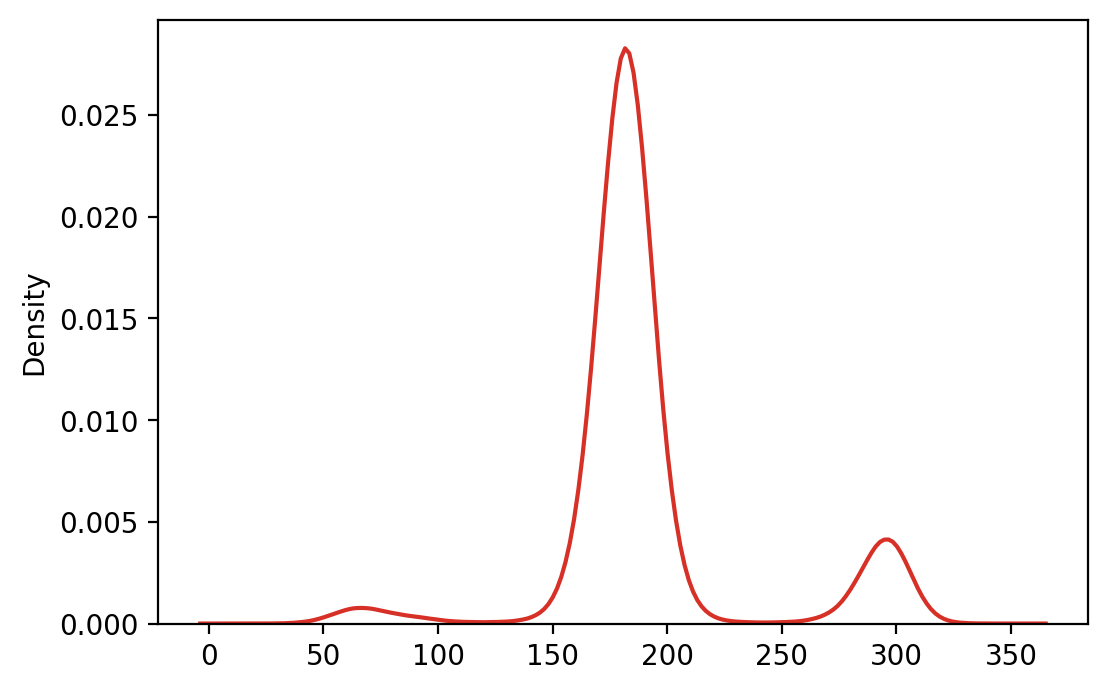

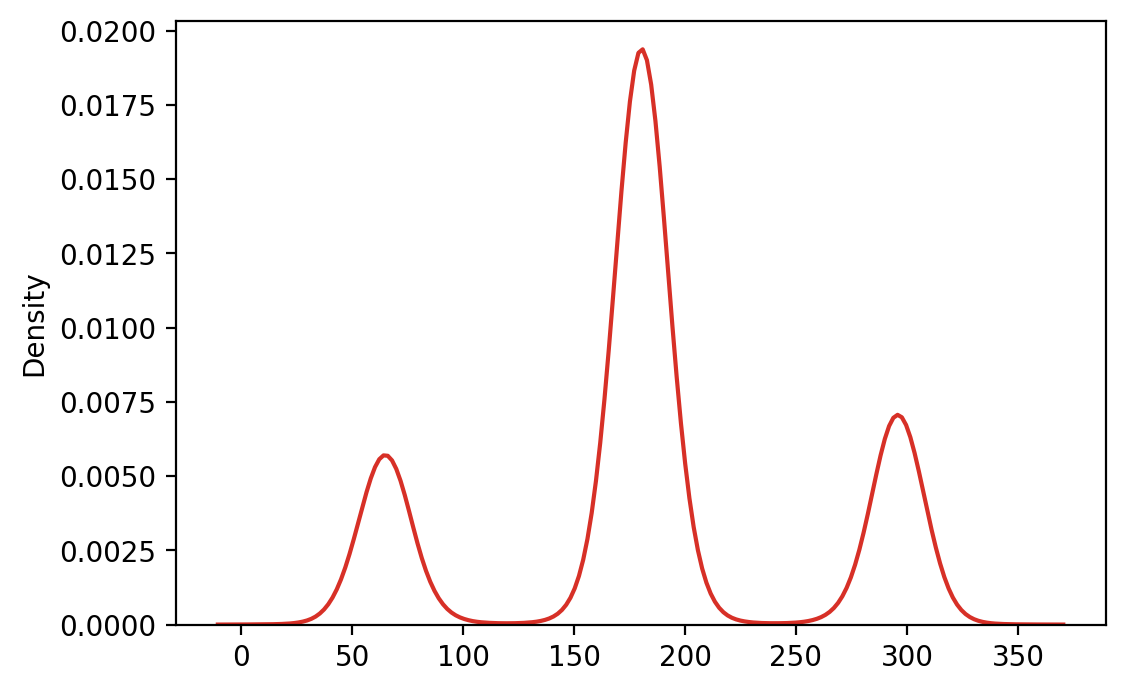

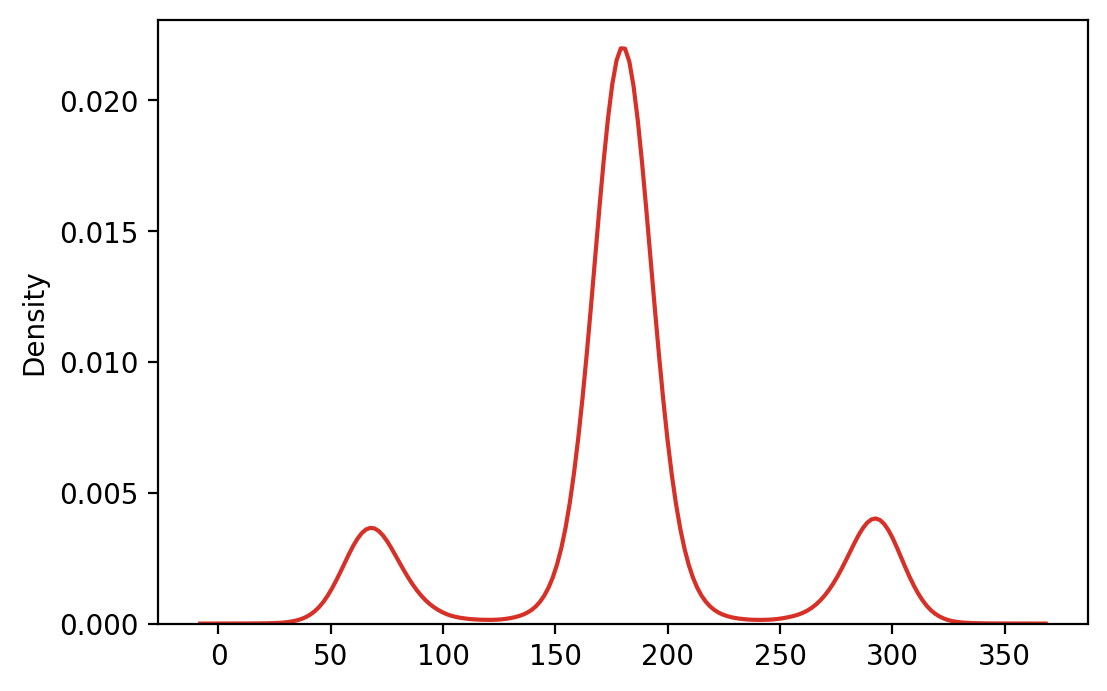

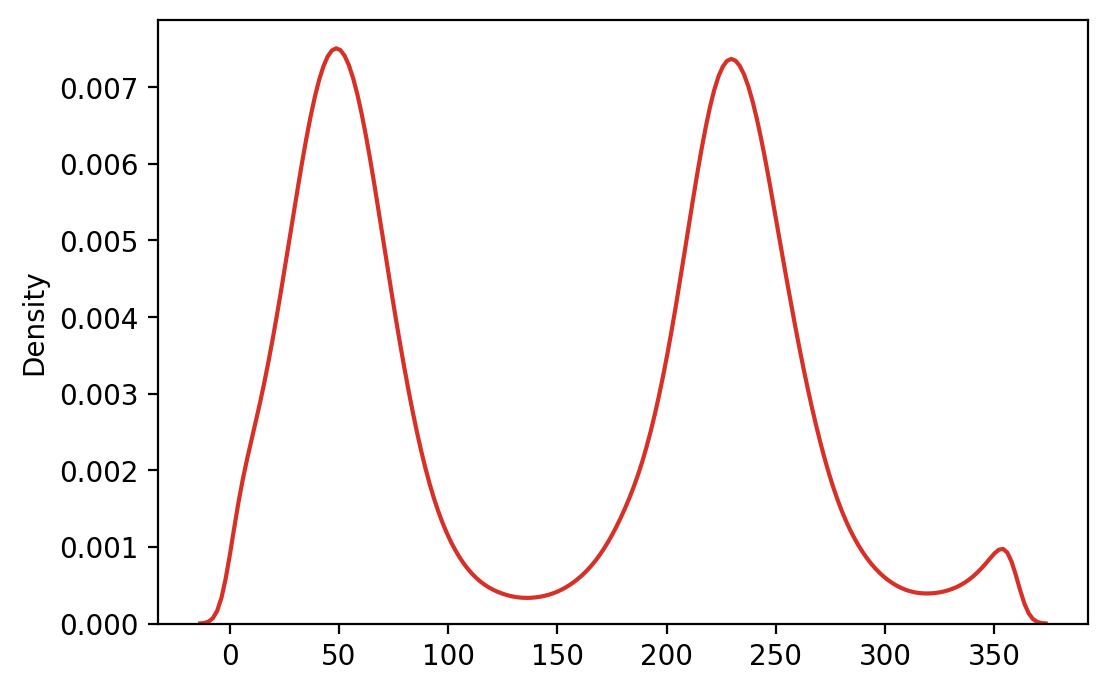

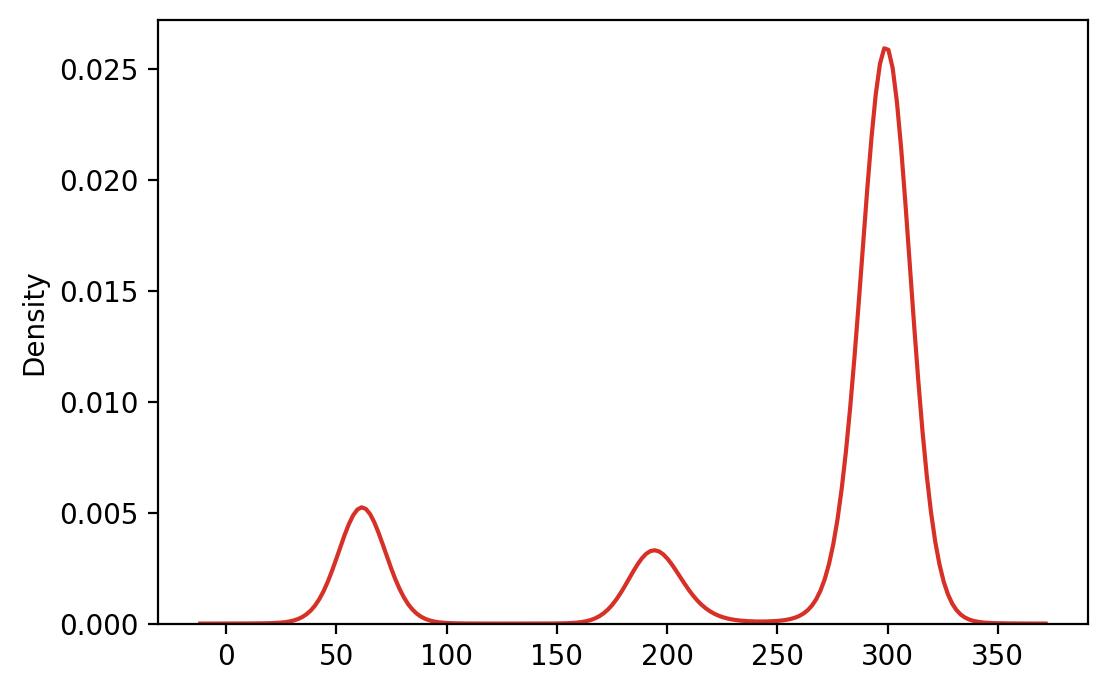

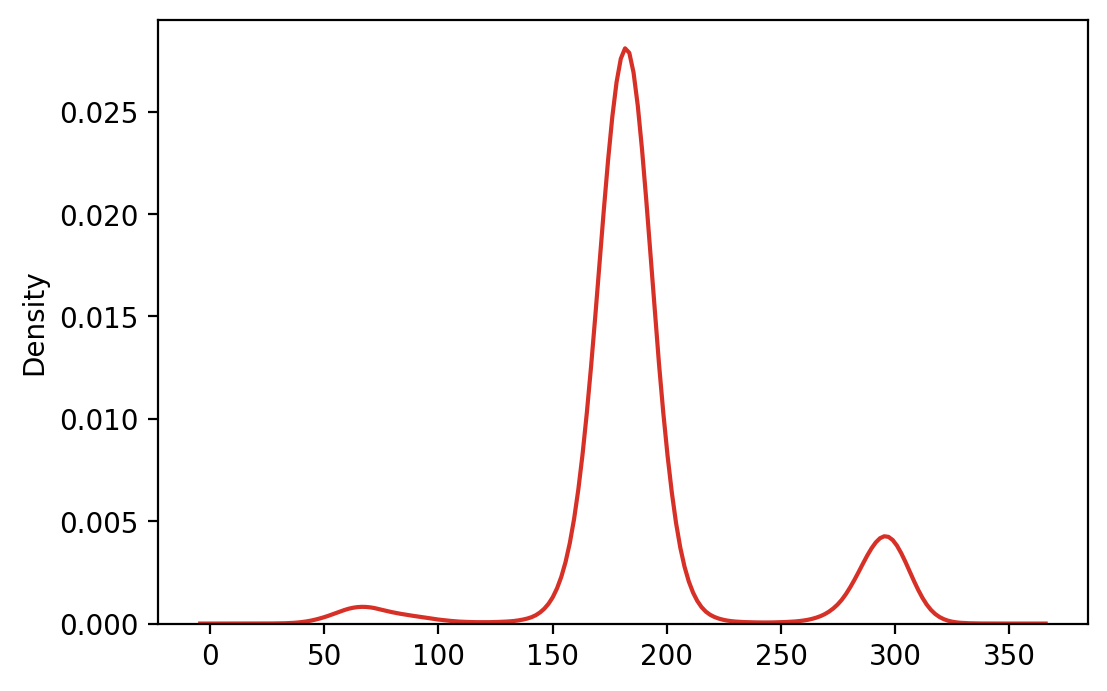

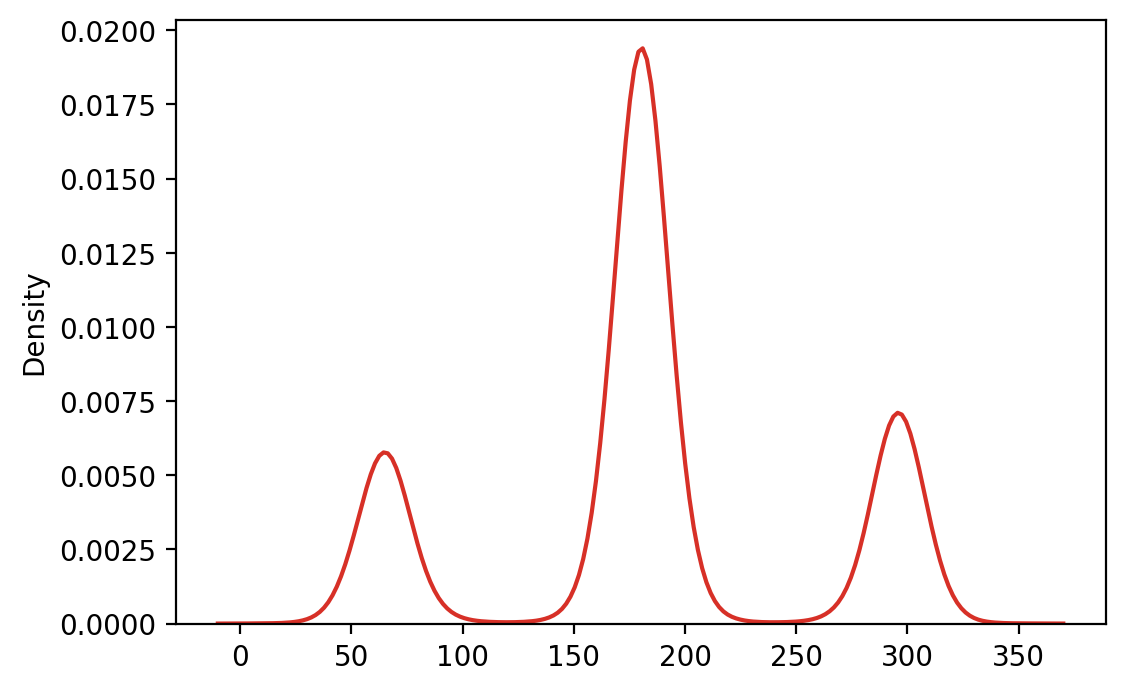

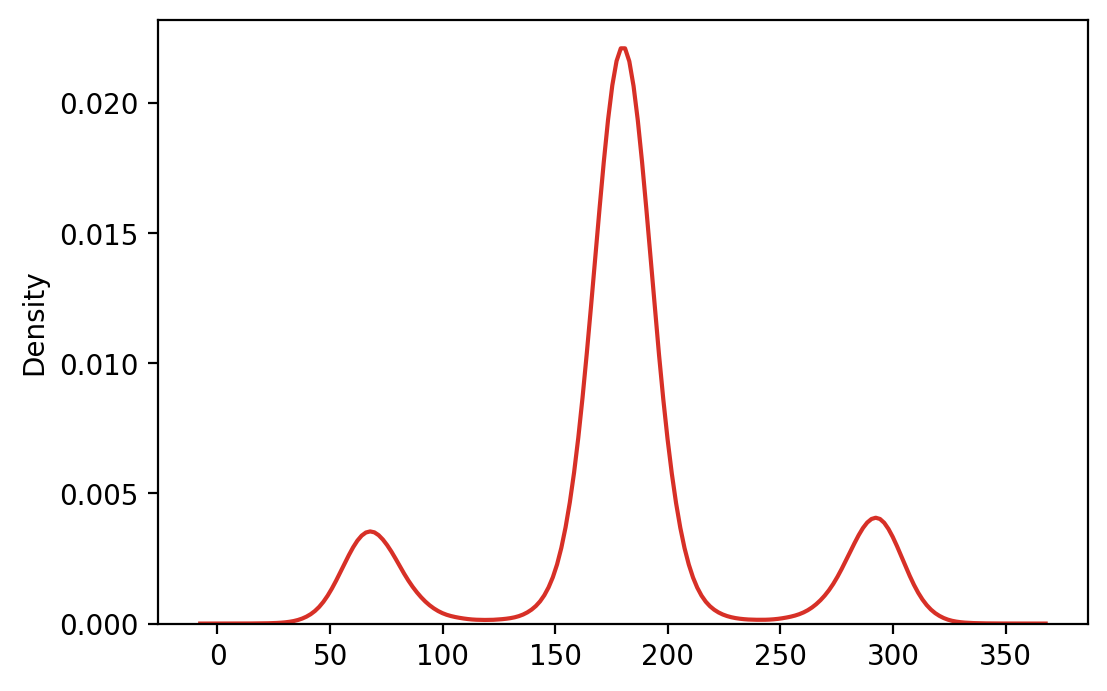

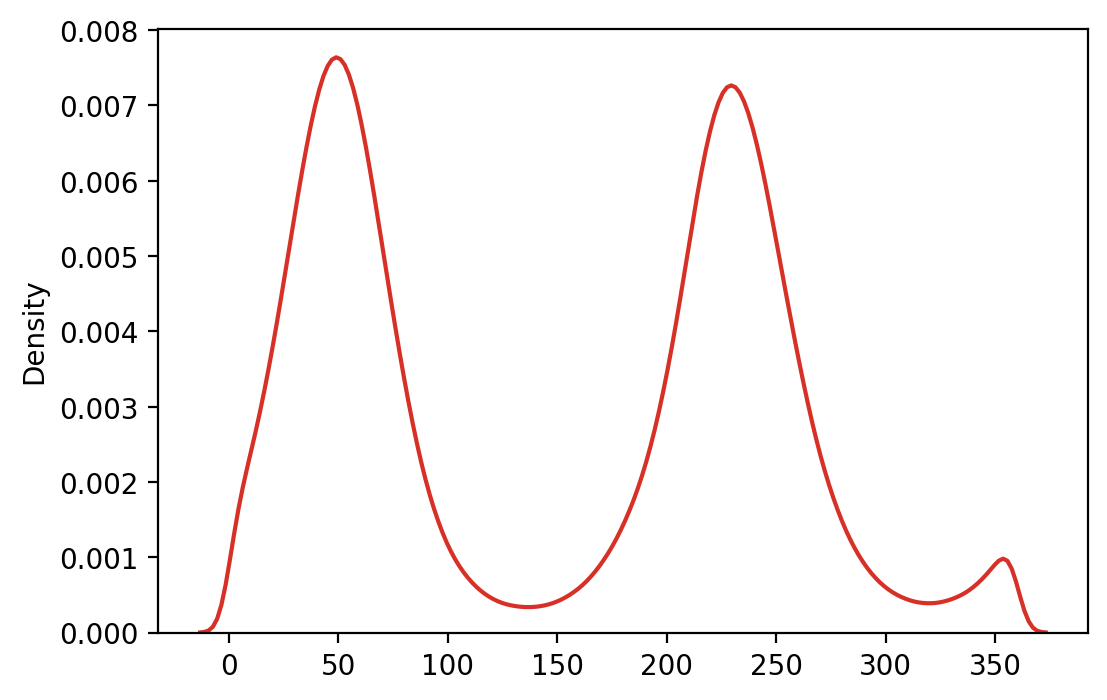

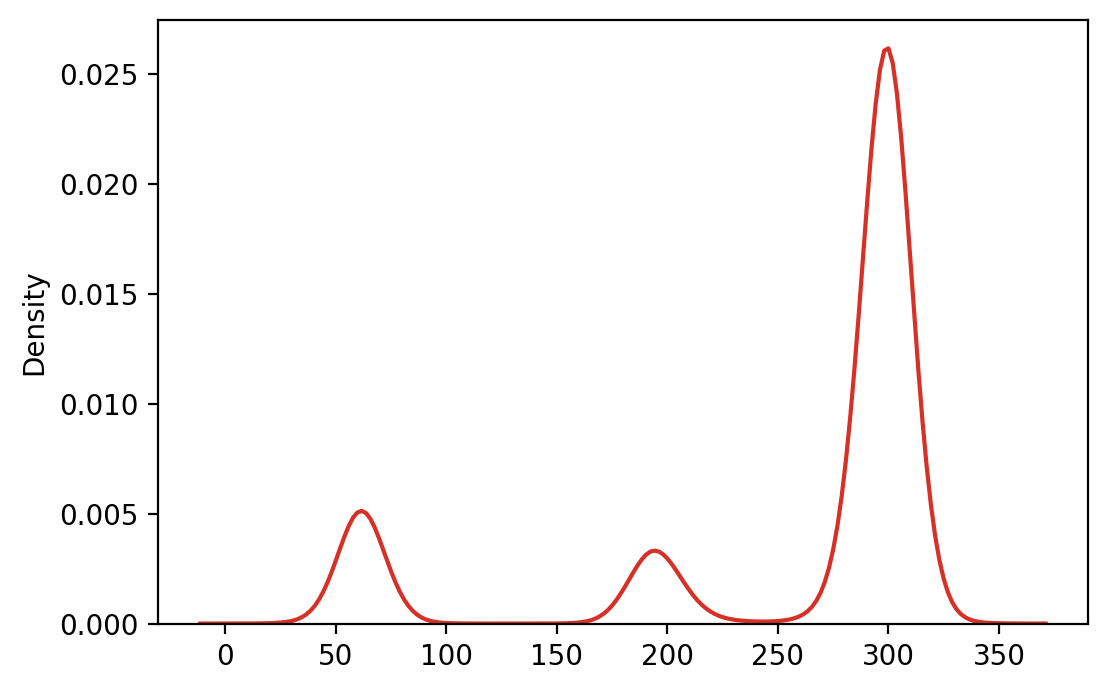

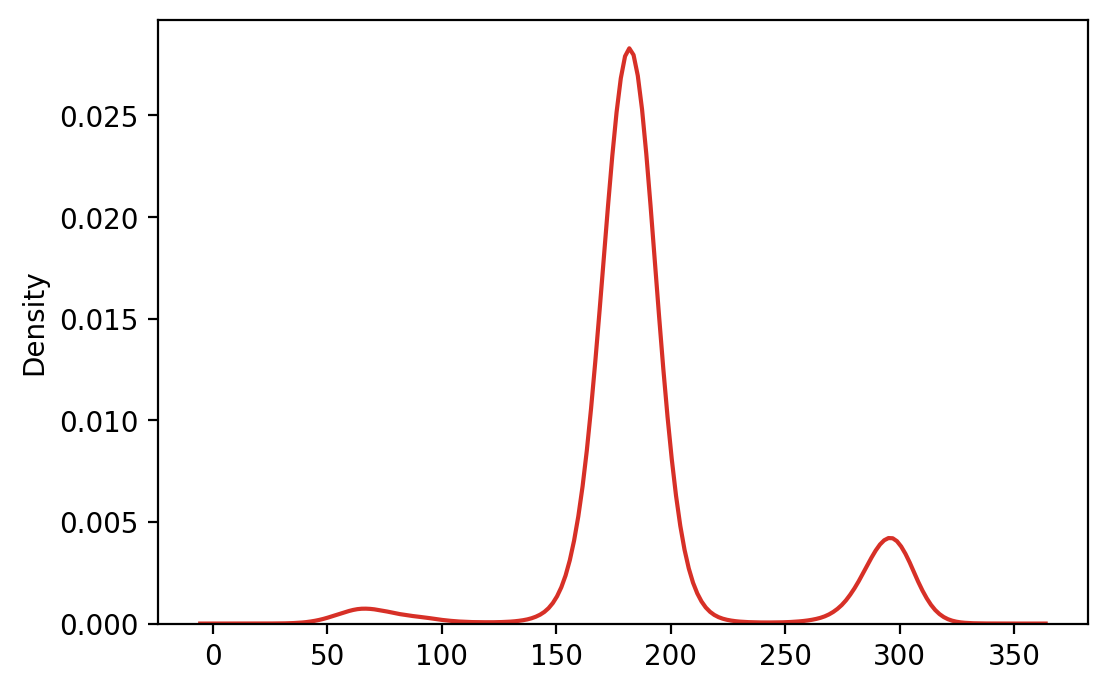

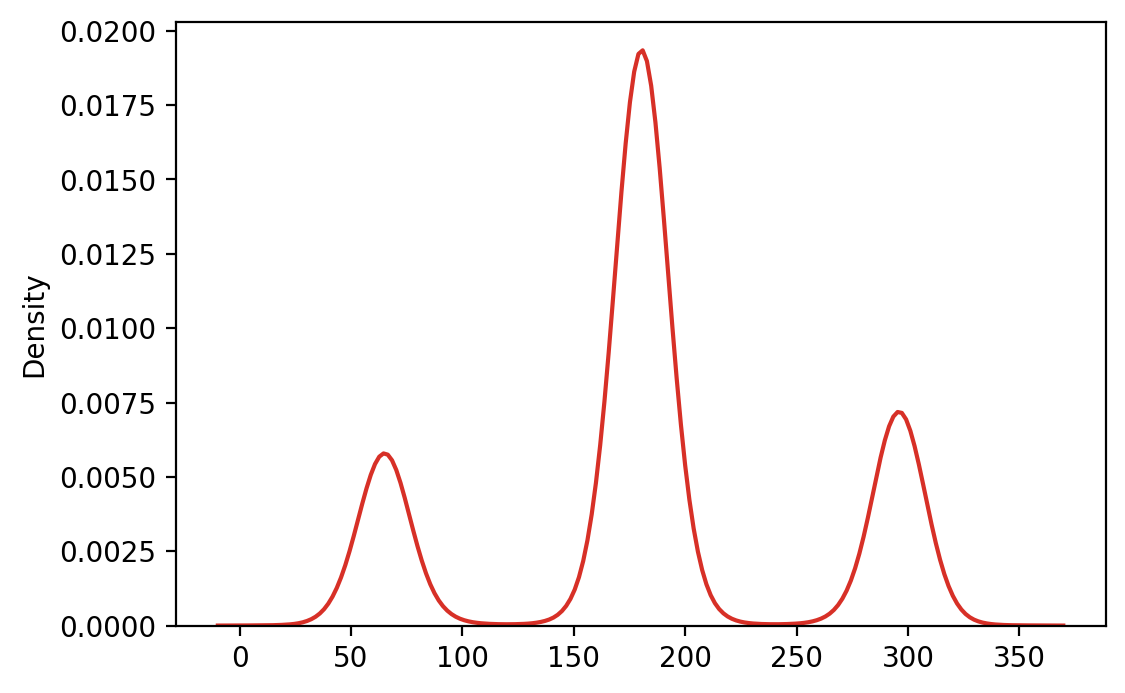

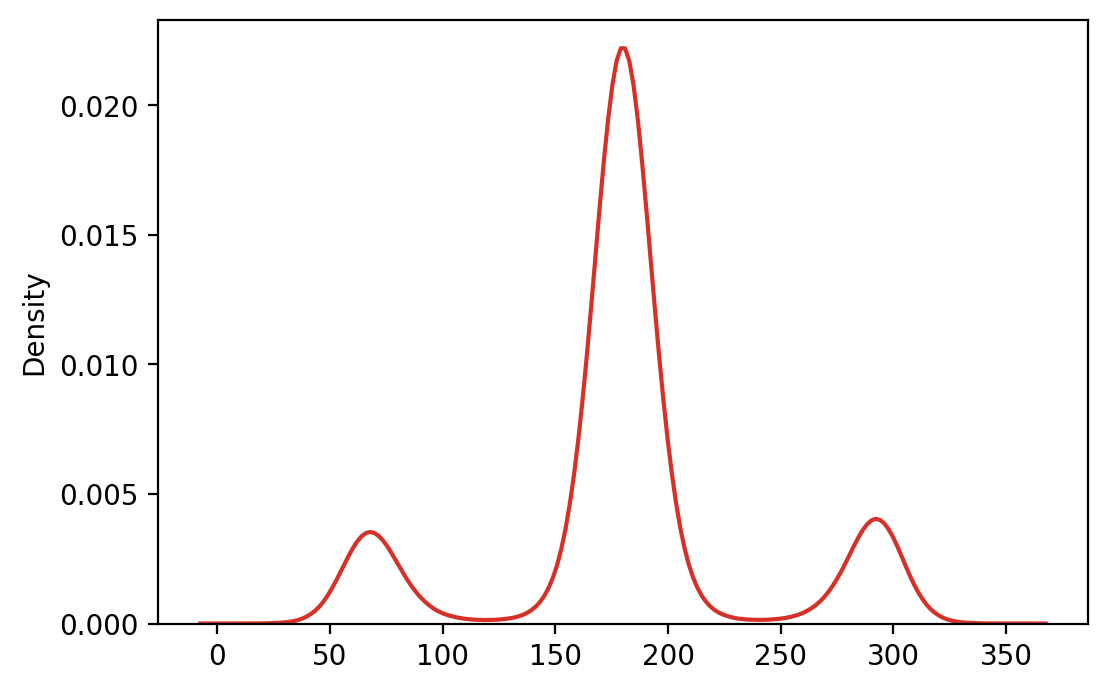

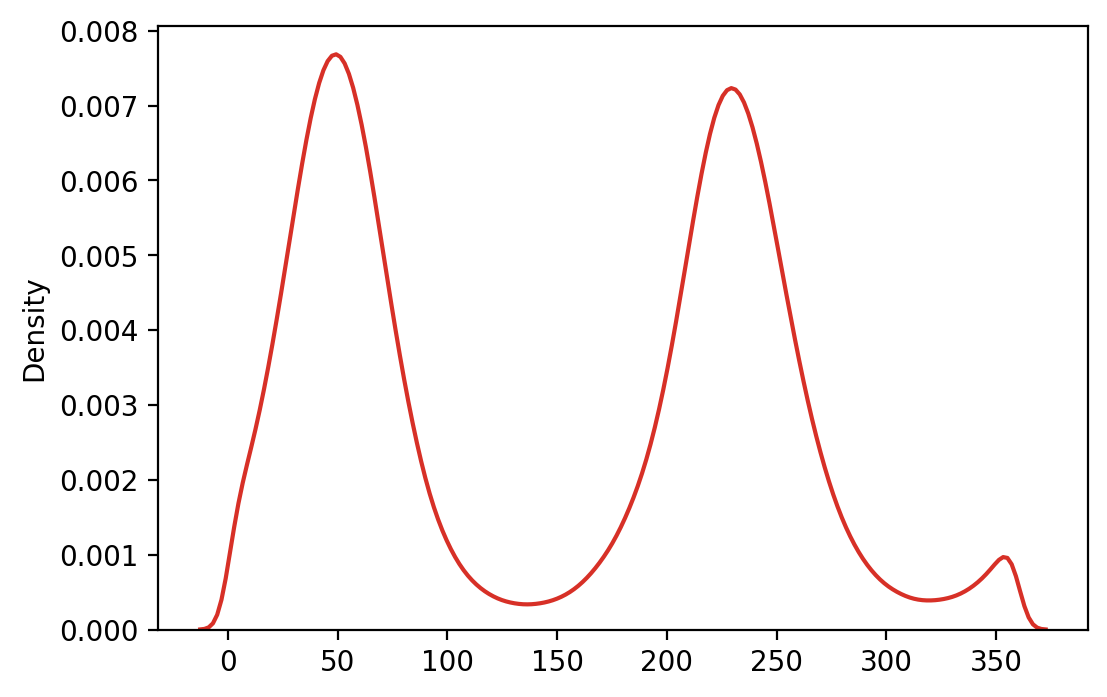

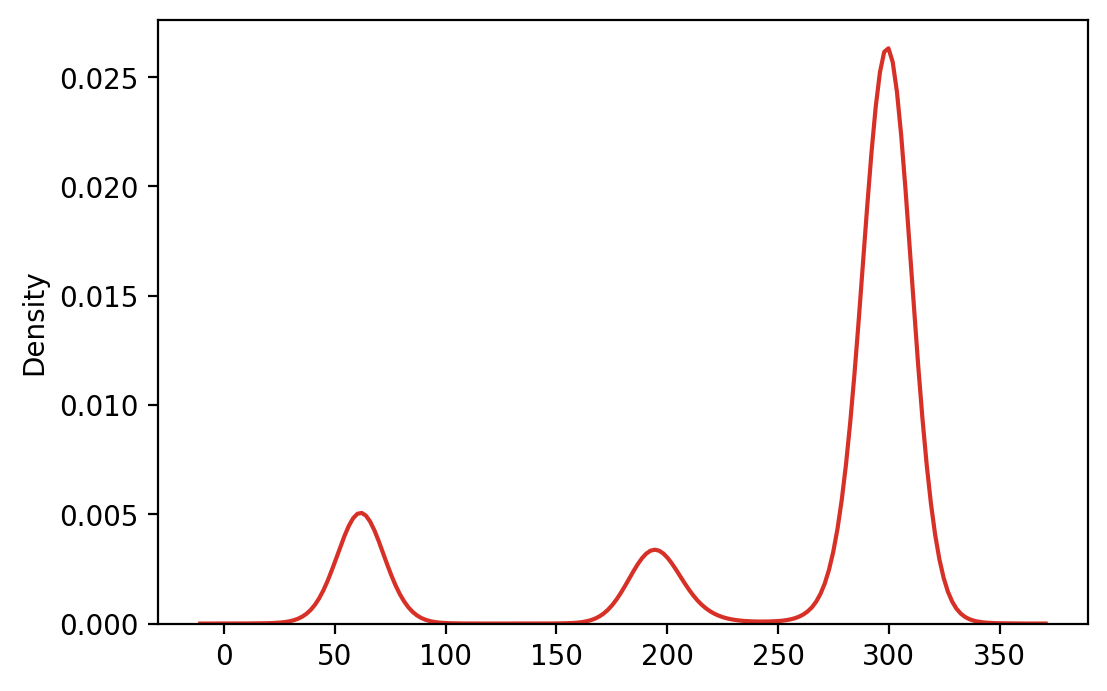

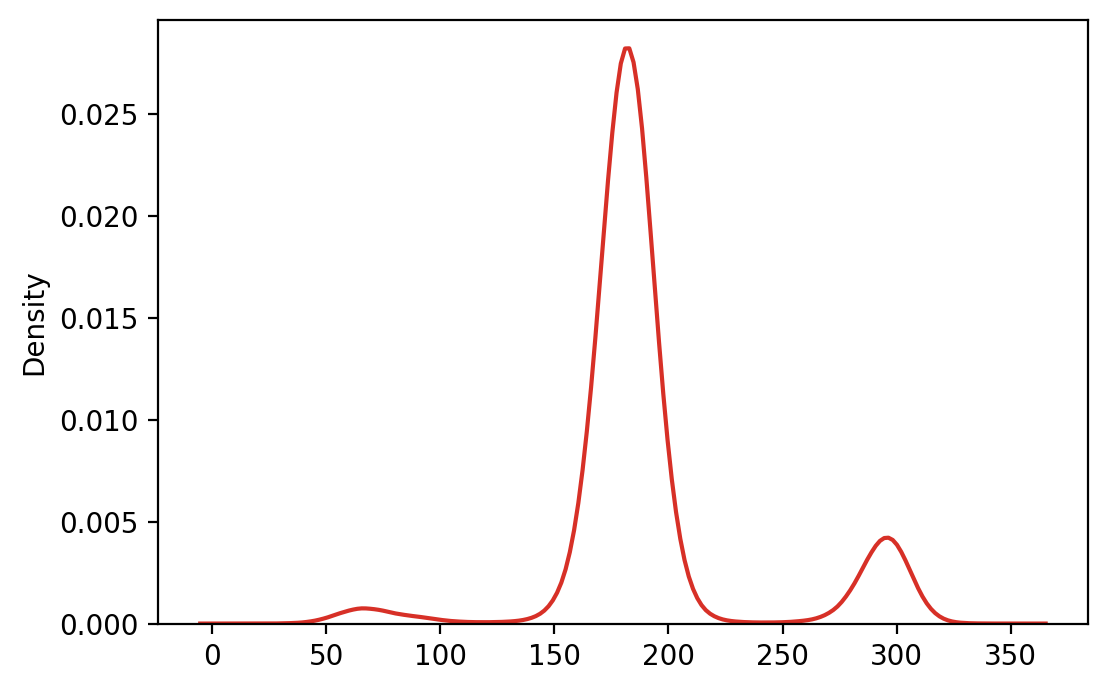

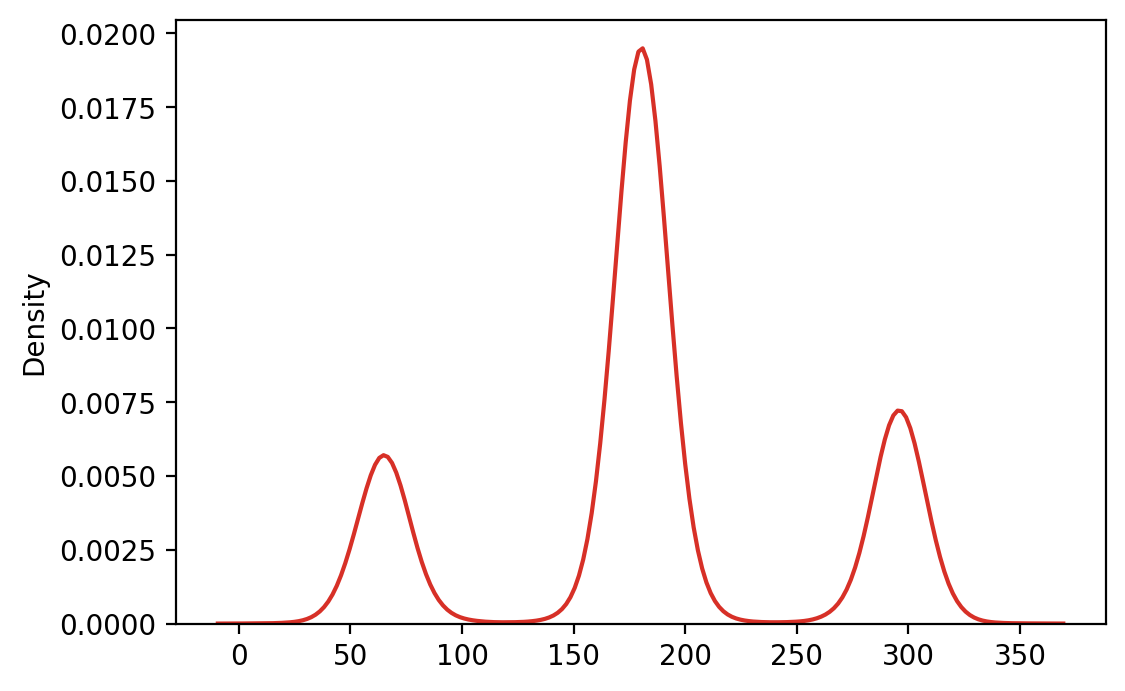

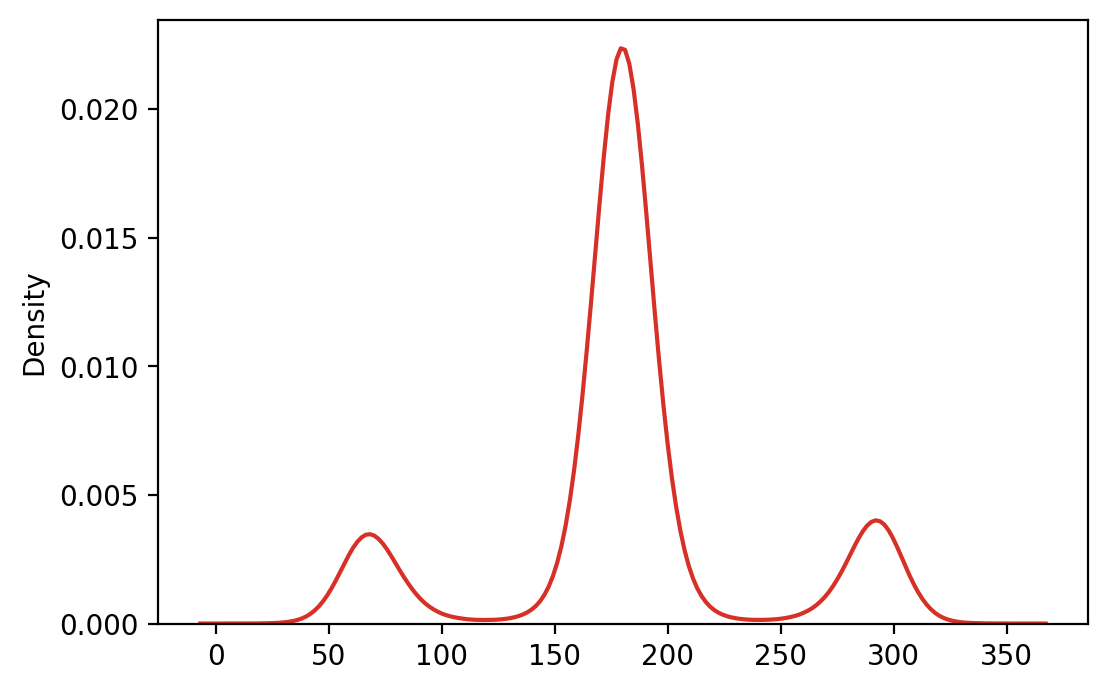

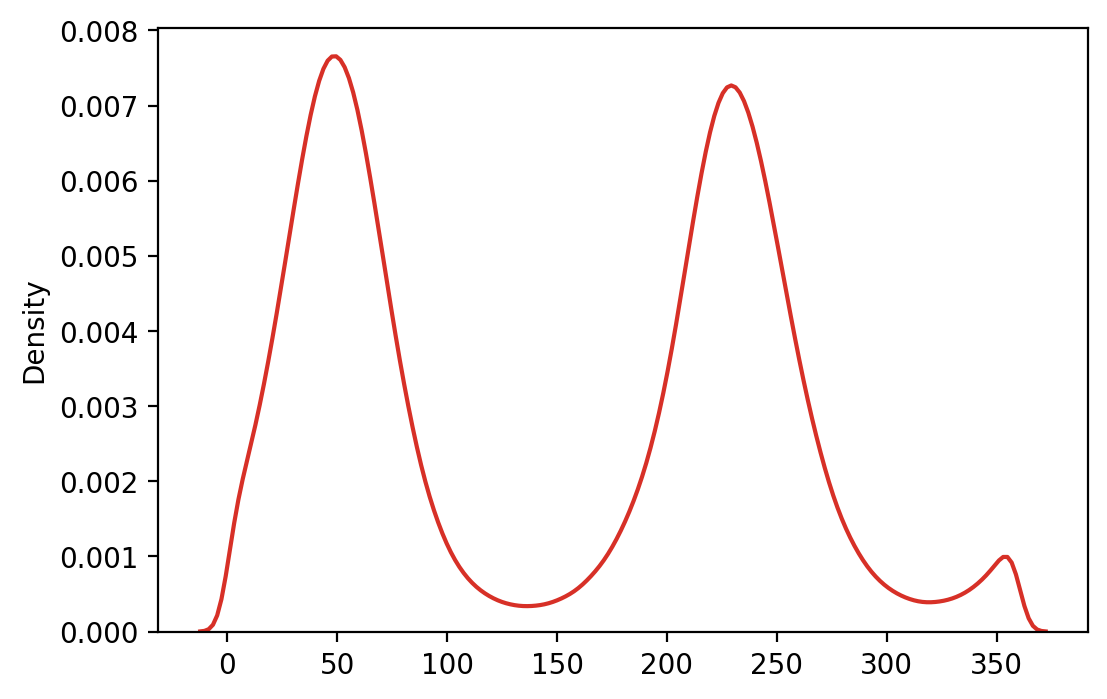

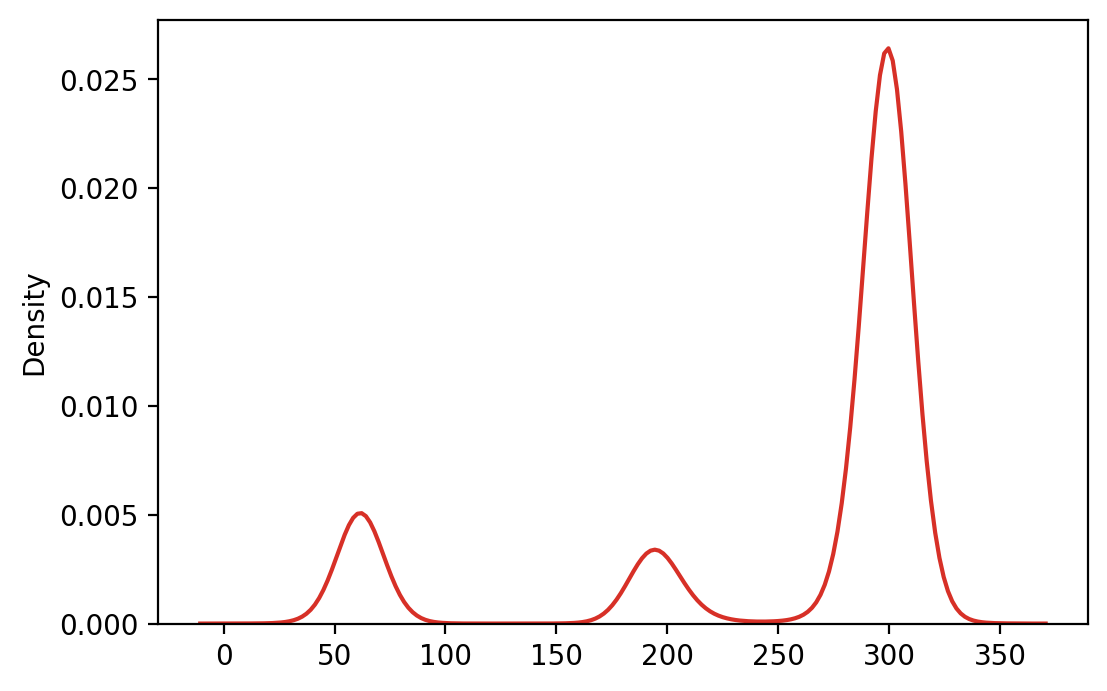

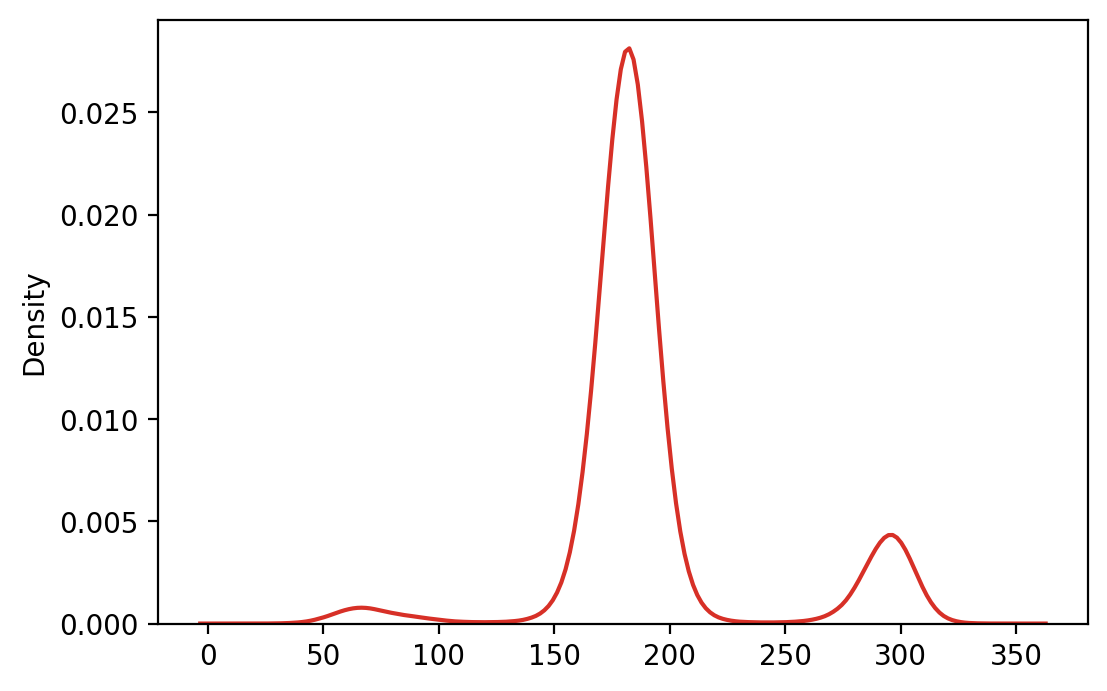

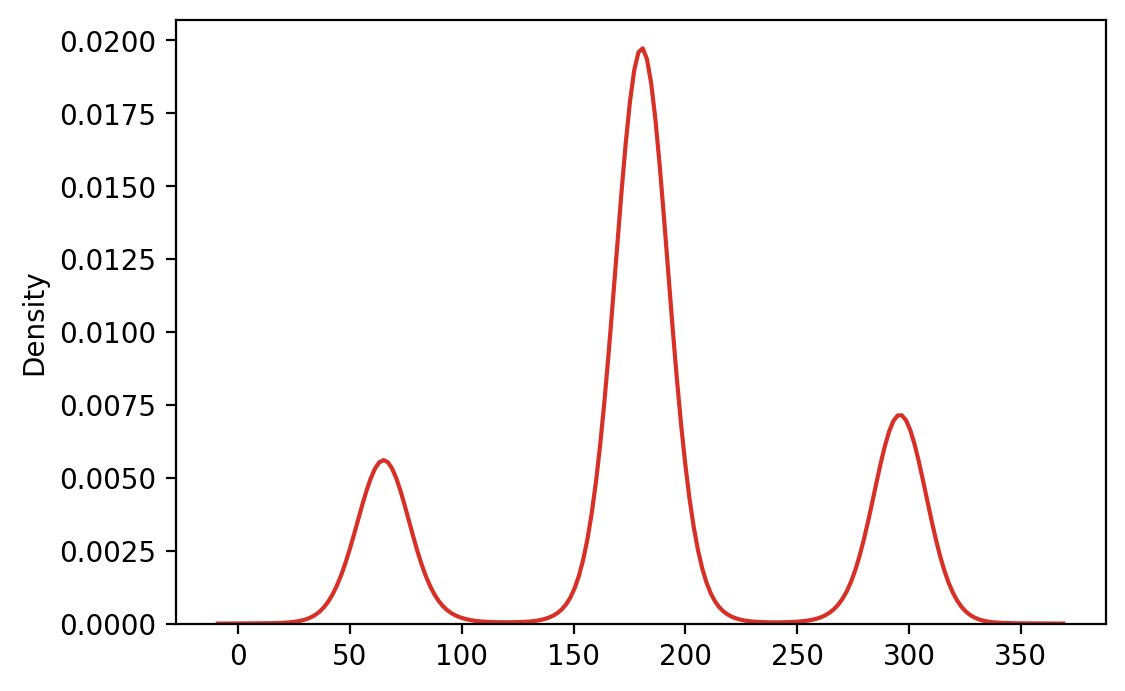

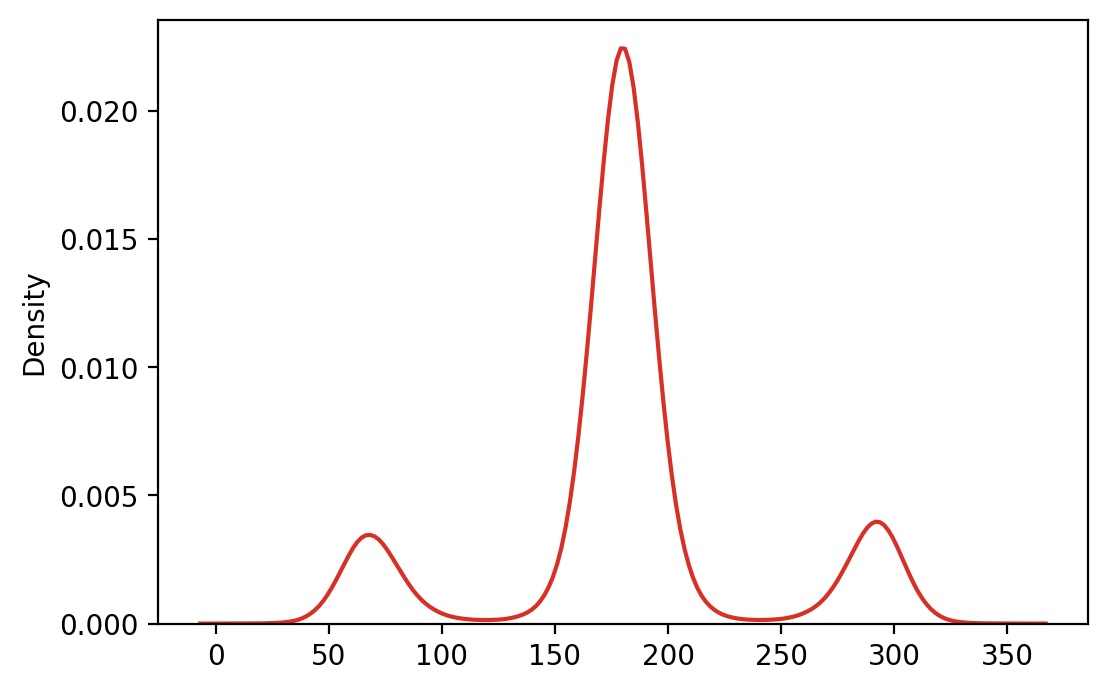

In [10]:
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

for concentration in concentrations:
    for angle in angles:
        for i, n_lys in enumerate(iglob(f'{work_dir}\{concentration}\{angle}.dat')):
            X = np.loadtxt(n_lys)
            data = X[:,1:].flatten()
            ax = sns.kdeplot(data)
            lines = ax.get_lines()
            x = lines[0].get_xdata()
            y = lines[0].get_ydata()

            np.savetxt(f'{angle}_{concentration}_data.txt', (x,y))
            plt.show()

In [47]:
np.save('alfa_data.txt', tot_data)

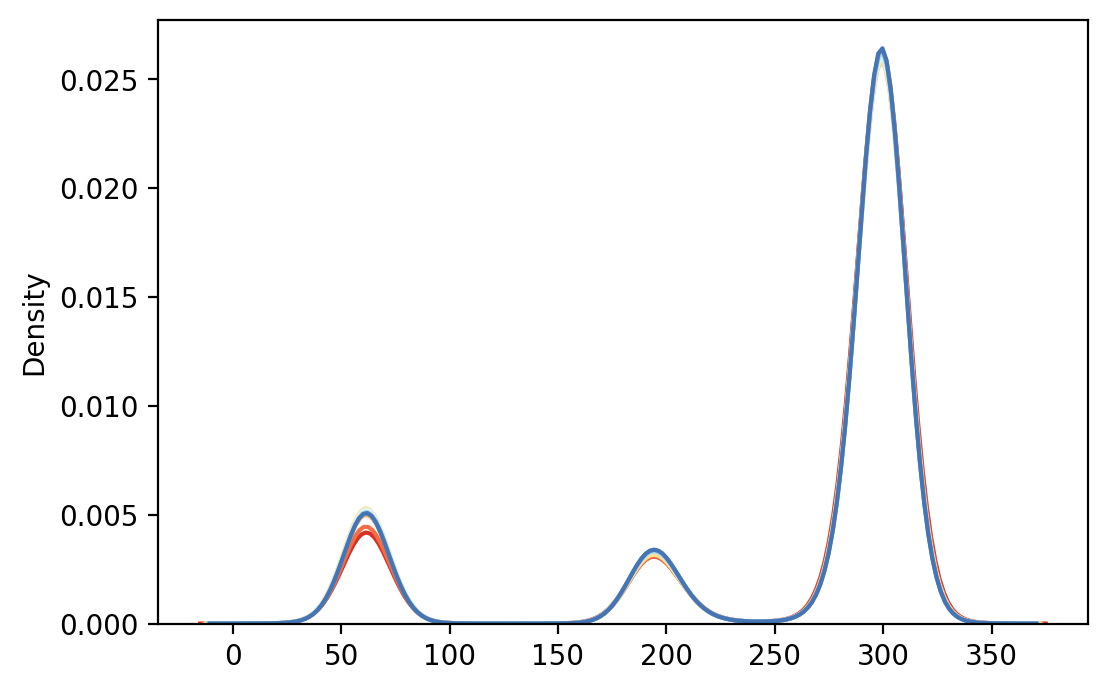

In [38]:
for i, n_lys in enumerate(iglob(f'{work_dir}/*/alfa.dat')):
    X = np.loadtxt(n_lys)
    X = X[:,1:].flatten()
    ax = sns.kdeplot(X, color=colors[i])
    lines = ax.get_lines()
    x = lines[0].get_xdata()
    y = lines[0].get_ydata()
    

In [ ]:

fig, ax = plt.subplots(1,2,figsize=(12.5*cm,7*cm),sharex=True, sharey=True,)
for n_lys in iglob(f'{work_dir}/10/[z,a,b,g,d][l,e,a,e]*.dat'):
    angle_name = n_lys.split('/')[-1].split('.')[0]
    X = np.loadtxt(n_lys)
    X = X[:,1:].flatten()
    sns.distplot(X, ax=ax[0],label=angle_name)


for n_lys in iglob(f'{work_dir}/80/[z,a,b,g,d][l,e,a,e]*.dat'):
    angle_name = n_lys.split('/')[-1].split('.')[0]
    X = np.loadtxt(n_lys)
    X = X[:,1:].flatten()
    sns.distplot(X, ax=ax[1],label=angle_name)
    
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax[1].grid()
ax[1].set_title('1.04 M')
ax[0].grid()
ax[0].set_title('0.12 M')

ax[0].set_xlim(0,360)